This is my attempt to implement an extremely simple Linear model in PyTorch. It is being done as part of my efforts to get really familiar with PyTorch; my go to exercise when learning a new framework has become implementing the simplest Linear model possible; if I can't do that easily, then I don't understand the philosophy of the framework.

In [33]:
from torch.autograd import Variable
import torch
import torch.utils.data
import torch.nn as nn
import numpy as np
import torch.optim as optim

Here, we're defining a Linear function that takes in a vector, x, some coefficients and returns the output of applying the linear function created by the coefficients.

In [34]:
def lin(x,a,b):
    return a*x + b 

Just specifying some constants. 

Notice that in the last line of this block, I am adding some random Gaussian noise to the output of the linear function so as to make it somewhat less contrived.

In [35]:
num_samples = 100
X = torch.linspace(-5,5,num_samples)
coefficient = 2
intercept = 3
Y = lin(X, coefficient, intercept) + torch.randn(num_samples) 

In [36]:
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt

Here, I'd just like to get a look at what my points are.

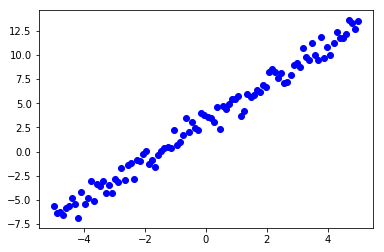

In [38]:
plt.plot(X.numpy(),Y.numpy(), 'bo')

Now, we have to create the linear model in PyTorch and use SGD or some other optimizer to learn the correct values of the coefficients from the data.

Since PyTorch is more OO, I'm creating a Net class that will model the linear function I'm trying to approximate. We'll define a Linear layer with 1 input and 1 output.

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.fc(x)
        return x
    

net = Net()
print(net)

Net (
  (fc): Linear (1 -> 1)
)


Just to make sure I've understood correctly, I'm going to check the number of parameters. It should be 2, since we're going to have one weight and one bias term.

In [40]:
params = list(net.parameters())
print(len(params))

2


In [51]:
# set up train loader
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X,Y))
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.000001, momentum=0.9)

In [53]:

for i in range(10):
    for i, data in enumerate(trainloader):
        inputs, output = data
        inputs, output = Variable(inputs.float()), Variable(output.float())
        optimizer.zero_grad()
        out = net(inputs)
        loss = criterion(out, output)
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print("Loss = ", loss.data[0])
    

Loss =  1.898311734199524
Loss =  0.29359039664268494
Loss =  1.8969467878341675
Loss =  0.293199360370636
Loss =  1.8955862522125244
Loss =  0.2928096354007721
Loss =  1.89424467086792
Loss =  0.2924206554889679
Loss =  1.8929073810577393
Loss =  0.2920324504375458
Loss =  1.8915797472000122
Loss =  0.29164424538612366
Loss =  1.8902565240859985
Loss =  0.2912575900554657
Loss =  1.8889416456222534
Loss =  0.2908722162246704
Loss =  1.8876351118087769
Loss =  0.2904881536960602
Loss =  1.8863341808319092
Loss =  0.29010429978370667


In [50]:
params = list(net.parameters())
for i in params:
    print(i)

Parameter containing:
 1.9824
[torch.FloatTensor of size 1x1]

Parameter containing:
 2.9345
[torch.FloatTensor of size 1]

